In [5]:
# Importing packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pprint import pprint

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from collections import Counter

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import umap.umap_ as umap

In [6]:
# loading dataset
path_3 = "datasets/diabetes_012_health_indicators_BRFSS2015.csv"

df_t = pd.read_csv(path_3)

[Ternary] After Undersampling: Counter({2.0: 35346, 0.0: 35000, 1.0: 4631})
[Ternary] After SMOTEENN: Counter({1.0: 33819, 0.0: 14476, 2.0: 5885})
[Ternary] After TomekLinks: Counter({1.0: 33818, 0.0: 14467, 2.0: 5885})


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


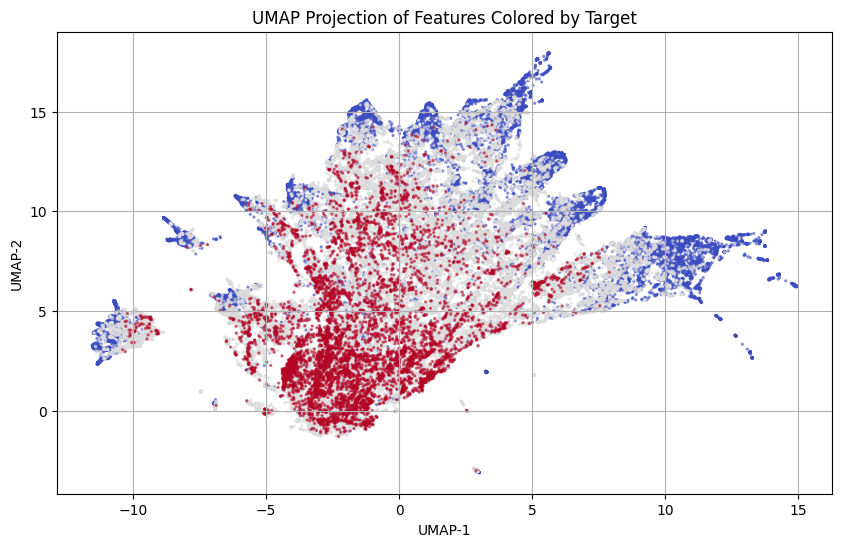

In [7]:
X = df_t.drop(columns=['Diabetes_012'])
y = df_t['Diabetes_012']

undersample2 = RandomUnderSampler(sampling_strategy={0.0: 35000}, random_state=17)
X_und, y_und = undersample2.fit_resample(X, y)

print("[Ternary] After Undersampling:", Counter(y_und))

#smote = SMOTE(random_state=22, sampling_strategy="auto")
#X_und, y_und = smote.fit_resample(X_und, y_und)
#print("[Ternary] After SMOTE:", Counter(y_und))

smote2 = SMOTEENN(random_state=42, sampling_strategy="auto", n_jobs=-1)
X_und, y_und = smote2.fit_resample(X_und, y_und)
print("[Ternary] After SMOTEENN:", Counter(y_und))

tomek = TomekLinks()
X_und, y_und = tomek.fit_resample(X_und, y_und)
print("[Ternary] After TomekLinks:", Counter(y_und))

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_und)

pca = PCA(n_components=7) 
X_scaled = pca.fit_transform(X_scaled)

# Apply UMAP for 2D projection
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_und, cmap='coolwarm', s=2, alpha=0.5)
plt.title("UMAP Projection of Features Colored by Target")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()